# DSO 522: Applied Time Series Analysis for Forecasting

## Week 14: Advanced Deep Learning Methods for Forecasting (Part I)

In [33]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

# Introduction to Neural Networks

A neural network is a computational model inspired by the human brain. It consists of layers of interconnected nodes (neurons) that process input data and learn patterns to make predictions. This section explains how a neural network works, focusing on regression tasks.

---


## 1. Components of a Neural Network

### 1.1 Input Layer
- The input layer is where the raw data enters the network.
- Each input corresponds to a feature of the data (e.g., numerical values).

### 1.2 Hidden Layers
- Hidden layers are where the model learns patterns in the data.
- Each hidden layer contains neurons that apply transformations to the inputs.
- Transformations involve:
  - **Weights** ($w$): Parameters that define how strongly an input influences a neuron.
  - **Biases** ($b$): Additional parameters that allow the neuron to shift activation.
  - **Activation Functions**: Non-linear functions (e.g., ReLU) that enable the network to model complex relationships.

The transformation for a single neuron in a hidden layer is:
$$
h = \sigma \left( \sum_{i} w_i \cdot x_i + b \right)
$$
Where:
- $h$ is the neuron's output (activation),
- $x_i$ are the inputs,
- $w_i$ are the weights,
- $b$ is the bias,
- $\sigma$ is the activation function (e.g., ReLU: $\max(0, x)$).

### 1.3 Output Layer
- The output layer produces the final prediction.
- For regression tasks:
  - It consists of a single neuron that outputs a continuous value.

---


Below is a diagram illustrating the process:

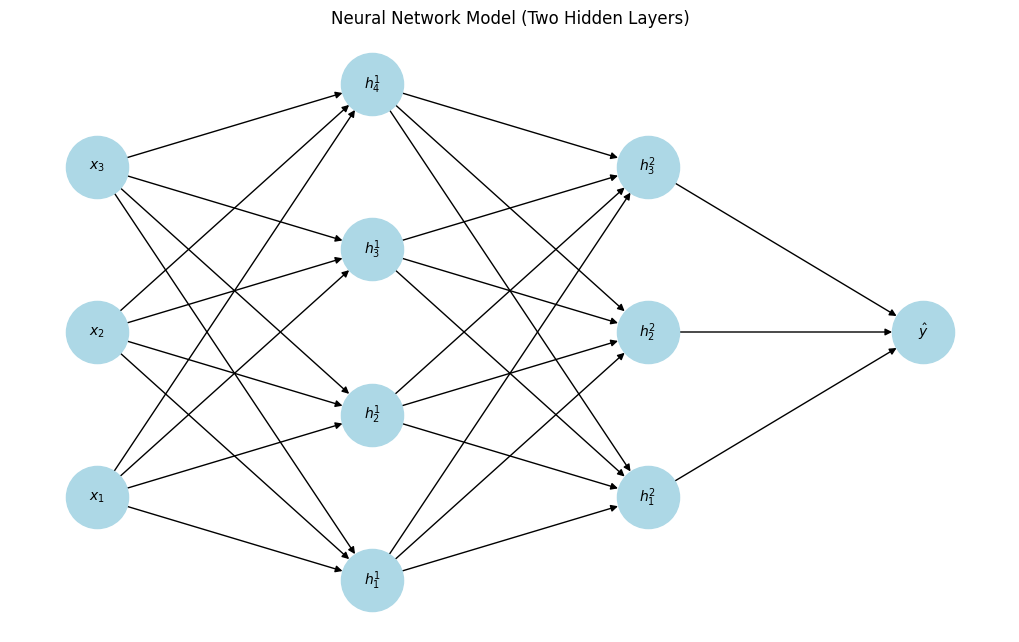

In [34]:
# Generate a detailed diagram for a neural network
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network():
    """
    Draw a diagram for a Neural Network Model with two hidden layers.
    """
    G = nx.DiGraph()

    # Input nodes (past time steps)
    input_nodes = [f"$x_{{{i}}}$" for i in range(1, 4)]  # y_{t-1}, y_{t-2}, y_{t-3}
    for i, node in enumerate(input_nodes):
        G.add_node(node, pos=(0, i))

    # First hidden layer
    hidden_layer1 = [f"$h^1_{{{i+1}}}$" for i in range(4)]  # Hidden layer 1 nodes
    for i, node in enumerate(hidden_layer1):
        G.add_node(node, pos=(1, i - 0.5))

    # Second hidden layer
    hidden_layer2 = [f"$h^2_{{{i+1}}}$" for i in range(3)]  # Hidden layer 2 nodes
    for i, node in enumerate(hidden_layer2):
        G.add_node(node, pos=(2, i - 0))

    # Output node
    output_node = "$\hat{y}$"
    G.add_node(output_node, pos=(3, 1))

    # Add edges: Input -> First Hidden Layer
    for input_node in input_nodes:
        for hidden_node in hidden_layer1:
            G.add_edge(input_node, hidden_node)

    # Add edges: First Hidden Layer -> Second Hidden Layer
    for hidden1_node in hidden_layer1:
        for hidden2_node in hidden_layer2:
            G.add_edge(hidden1_node, hidden2_node)

    # Add edges: Second Hidden Layer -> Output
    for hidden2_node in hidden_layer2:
        G.add_edge(hidden2_node, output_node)

    # Draw the network
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
    plt.title("Neural Network Model (Two Hidden Layers)")
    plt.show()

# Draw the neural network diagram
draw_neural_network()

### Example Architecture:
- **Input**: $[x_{1}, x_{2}, x_{3}]$
- **Hidden Layer 1**: 4 neurons with ReLU activation.
- **Hidden Layer 2**: 3 neurons with ReLU activation.
- **Output Layer**: 1 neuron for $\hat{y}$.



## 2. The Training Process

The network learns by iteratively adjusting its weights and biases to minimize errors. This involves the following steps:

### 2.1 Forward Pass
- The input data is passed through the network layer by layer.
- Each layer computes its outputs using the weights, biases, and activation functions.
- The final output is the network's prediction.

### 2.2 Loss Function
- The loss function measures how far the network's predictions are from the true values.
- For regression tasks, the most common loss function is **Mean Squared Error (MSE)**:
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$
  Where:
  - $y_i$ is the true value,
  - $\hat{y}_i$ is the predicted value,
  - $n$ is the number of data points.

### 2.3 Backpropagation
- Backpropagation calculates how much each weight and bias contributed to the error (using the chain rule of calculus).
- This step computes gradients of the loss function with respect to each parameter.

### 2.4 Gradient Descent
- Gradient descent updates the weights and biases to reduce the loss.
- Formula for updating a parameter:
  $$
  \theta \leftarrow \theta - \eta \cdot \frac{\partial L}{\partial \theta}
  $$
  Where:
  - $\theta$ is the parameter (weight or bias),
  - $\eta$ is the learning rate (controls the step size),
  - $\frac{\partial L}{\partial \theta}$ is the gradient of the loss $L$ with respect to $\theta$.

There are variations of gradient descent, such as:
- **Batch Gradient Descent**: Uses the entire dataset to compute gradients.
- **Stochastic Gradient Descent (SGD)**: Updates parameters using a single data point.
- **Mini-Batch Gradient Descent**: Updates parameters using a small batch of data.

### 2.5 Iterative Process
- The forward pass, loss computation, backpropagation, and gradient descent are repeated for many iterations (epochs) until the network learns the desired patterns.

---

## 3. Example Walkthrough

For a simple neural network:
1. **Input**: The network receives raw data (e.g., `[x_1, x_2, x_3]`).
2. **Hidden Layers**: Neurons in hidden layers transform the inputs:
   - Compute $h_1 = \sigma(w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b_1)$ for the first neuron, and similarly for others.
3. **Output Layer**: Combines outputs of the hidden layers to produce a prediction (e.g., $\hat{y}$).
4. **Training**:
   - The loss function computes the error between $\hat{y}$ and $y$.
   - Backpropagation calculates gradients to update weights and biases.
5. **Repeat**: Steps 1-4 are repeated until the network minimizes the error.

---



## 4. Key Concepts to Remember

1. **Learning Through Errors**: Neural networks improve by repeatedly making predictions, comparing them to actual values, and adjusting to reduce errors.
2. **Non-Linearity**: Activation functions allow networks to learn complex patterns, beyond just linear relationships.
3. **Parameter Optimization**: Weights and biases are the "knobs" the network tunes to improve performance.
4. **Iterative Nature**: Training a network is an iterative process that requires many passes over the data.

# Training an Autoregressive Neural Network for Forecasting

In this chapter, we will explain how to apply the principles of neural networks to train an autoregressive model for time series forecasting. The key idea is to use **lagged predictors** as inputs and train the network to predict the next value in the sequence.

---


## 1. What is an Autoregressive Neural Network?

An **autoregressive neural network** is a model that predicts the next value in a sequence using a fixed number of past observations as input.

For example:
- Input: $[x_{t-3}, x_{t-2}, x_{t-1}]$ (lagged values).
- Output: $\hat{y}_t$ (predicted next value).

The lagged predictors provide context from the past, and the neural network learns to map these inputs to the target output.

---


## 2. Preparing the Dataset

To train the model, we first transform the time series into a supervised learning dataset of input-output pairs.

### Steps to Prepare the Dataset:
1. **Define the Lag Size**:
   - The lag determines how many past observations are used as predictors.
   - For example, a lag of 3 means each input will consist of 3 consecutive time steps.

2. **Create Input-Output Pairs**:
   - Each input is a sequence of lagged values: $[y_{t-3}, y_{t-2}, y_{t-1}]$.
   - The output is the next value in the sequence: $y_t$.

3. **Split the Data**:
   - Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.

### Example:
Given a time series: $[y_1, y_2, y_3, y_4, y_5, y_6, y_7]$ and a lag size of 3:
- Inputs ($X$):
  $$
  X = \begin{bmatrix}
  y_1 & y_2 & y_3\\
  y_2 & y_3 & y_4 \\
  y_3 & y_4 & y_5 \\
  y_4 & y_5 & y_6
  \end{bmatrix}
  $$
- Outputs ($Y$):
  $$
  Y = \begin{bmatrix}
  y_4 \\
  y_5 \\
  y_6 \\
  y_7
  \end{bmatrix}
  $$

## Generalized Dataset Construction

Given a time series $y = [y_1, y_2, ..., y_T]$ and a lag $L$:

1. The number of input-output pairs will be $T - L$.
2. Each input $X_i$ is a sequence:
   $$
   X_i = [y_{t-L}, y_{t-L+1}, ..., y_{t-1}]
   $$
3. The corresponding output $Y_i$ is:
   $$
   Y_i = y_{i}
   $$

This process results in:
- An input matrix $X$ of shape $(T-L) \times L$.
- An output matrix $Y$ of shape $(T-L) \times 1$.
---

## 3. Building the Neural Network

The architecture of the neural network for an autoregressive model includes:
1. **Input Layer**:
   - Takes the lagged values as input (size = lag).
2. **Hidden Layers**:
   - One or more fully connected layers with non-linear activation functions (e.g., ReLU).
3. **Output Layer**:
   - A single neuron that outputs the predicted next value.
   
---

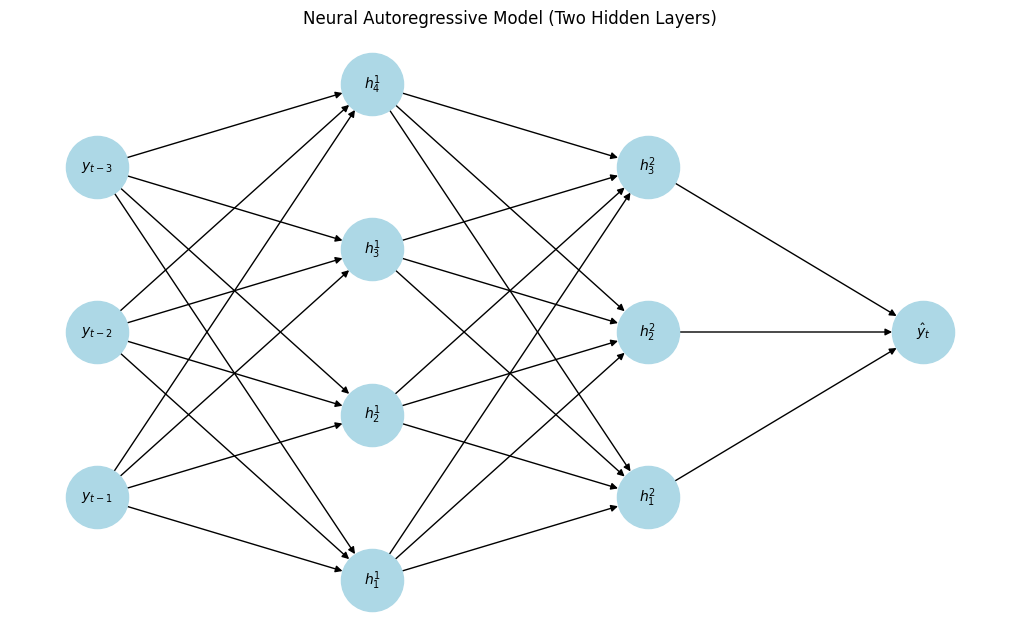

In [35]:
# Generate a detailed diagram for the Neural Autoregressive Model

def draw_neural_network_forecast():
    """
    Draw a diagram for a Neural Autoregressive Model with two hidden layers.
    """
    G = nx.DiGraph()

    # Input nodes (past time steps)
    input_nodes = [f"$y_{{t-{i}}}$" for i in range(1, 4)]  # y_{t-1}, y_{t-2}, y_{t-3}
    for i, node in enumerate(input_nodes):
        G.add_node(node, pos=(0, i))

    # First hidden layer
    hidden_layer1 = [f"$h^1_{{{i+1}}}$" for i in range(4)]  # Hidden layer 1 nodes
    for i, node in enumerate(hidden_layer1):
        G.add_node(node, pos=(1, i - 0.5))

    # Second hidden layer
    hidden_layer2 = [f"$h^2_{{{i+1}}}$" for i in range(3)]  # Hidden layer 2 nodes
    for i, node in enumerate(hidden_layer2):
        G.add_node(node, pos=(2, i - 0))

    # Output node (next predicted value)
    output_node = "$\hat{y}_t$"
    G.add_node(output_node, pos=(3, 1))

    # Add edges: Input -> First Hidden Layer
    for input_node in input_nodes:
        for hidden_node in hidden_layer1:
            G.add_edge(input_node, hidden_node)

    # Add edges: First Hidden Layer -> Second Hidden Layer
    for hidden1_node in hidden_layer1:
        for hidden2_node in hidden_layer2:
            G.add_edge(hidden1_node, hidden2_node)

    # Add edges: Second Hidden Layer -> Output
    for hidden2_node in hidden_layer2:
        G.add_edge(hidden2_node, output_node)

    # Draw the network
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
    plt.title("Neural Autoregressive Model (Two Hidden Layers)")
    plt.show()

# Draw the neural network diagram
draw_neural_network_forecast()

### Example Architecture:
- **Input**: $[y_{t-3}, y_{t-2}, y_{t-1}]$
- **Hidden Layer 1**: 4 neurons with ReLU activation.
- **Hidden Layer 2**: 3 neurons with ReLU activation.
- **Output Layer**: 1 neuron for $\hat{y}_t$.


## 4. Training the Model

### Steps in the Training Process:
1. **Forward Pass**:
   - Pass the input through the network to compute the prediction $\hat{y}_t$.
2. **Compute the Loss**:
   - Use a loss function (e.g., Mean Squared Error) to measure the difference between $\hat{y}_t$ and $y_t$.
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
   $$
3. **Backpropagation**:
   - Calculate the gradients of the loss with respect to the network's weights and biases.
4. **Gradient Descent**:
   - Update the weights and biases to minimize the loss:
   $$
   \theta \leftarrow \theta - \eta \cdot \frac{\partial L}{\partial \theta}
   $$
5. **Repeat**:
   - Iterate through the dataset for multiple epochs to train the model.

---

## 5. Forecasting with the Trained Model

Once the model is trained, it can be used to forecast future values:
1. **Single-Step Prediction**:
   - Input: The most recent lagged values.
   - Output: The predicted next value $\hat{y}_t$.

2. **Multi-Step Forecasting**:
   - Use the predicted value $\hat{y}_t$ as input to predict the next step.
   - Repeat this process iteratively to forecast multiple steps ahead.

### Example:
To forecast a horizon of 3 steps:
1. Use $[y_{t-3}, y_{t-2}, y_{t-1}]$ to predict $\hat{y}_t$.
2. Shift the window and use $[y_{t-2}, y_{t-1}, \hat{y}_t]$ to predict $\hat{y}_{t+1}$.
3. Repeat to predict $\hat{y}_{t+2}$.

---

# Hands-On Example

## Simulating a time series data set

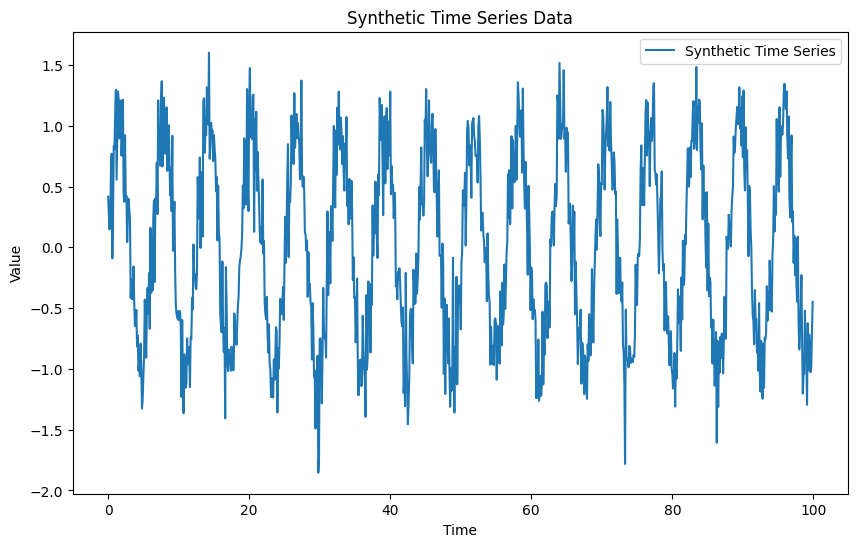

In [36]:
# Generate a synthetic time series dataset
np.random.seed(2024)
time = np.arange(0, 100, 0.1)
data = np.sin(time) + 0.25 * np.random.normal(size=len(time))

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(time, data, label="Synthetic Time Series")
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

## Preparing the Data for Neural Networks

In [37]:
# Define a function to prepare data in sliding window format
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length])
    return np.array(sequences), np.array(targets)

SEQ_LENGTH = 20
sequences, targets = create_sequences(data, SEQ_LENGTH)

In [38]:
# Sequentially split the data into training and testing sets
def split_time_series(data, targets, test_size=0.2):
    """
    Splits time series data into training and testing sets while preserving temporal order.

    Args:
        data (ndarray): The input sequences (e.g., lagged predictors).
        targets (ndarray): The target values corresponding to the input sequences.
        test_size (float): Proportion of the data to use for testing (default: 0.2).

    Returns:
        tuple: X_train, X_test, y_train, y_test
    """
    n_test = int(len(data) * test_size)
    X_train, X_test = data[:-n_test], data[-n_test:]
    y_train, y_test = targets[:-n_test], targets[-n_test:]
    return X_train, X_test, y_train, y_test

# Split into training and testing sets
X_train, X_test, y_train, y_test = split_time_series(sequences, targets, test_size=0.2)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 784
Testing set size: 196


## Building a Simple Neural Autoregressive Model

In [39]:
# Define the PyTorch Dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [40]:
# Define the Neural Network Model
class NeuralARModel(nn.Module):
    def __init__(self, input_size):
        super(NeuralARModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [41]:
# Instantiate the model, define loss function and optimizer
model = NeuralARModel(input_size=SEQ_LENGTH)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Training the Model

In [42]:
# Train the Neural Autoregressive Model
EPOCHS = 100
for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {train_loss:.4f}")

Epoch 1/100, Loss: 0.6197
Epoch 2/100, Loss: 0.5333
Epoch 3/100, Loss: 0.3799
Epoch 4/100, Loss: 0.1737
Epoch 5/100, Loss: 0.0860
Epoch 6/100, Loss: 0.0822
Epoch 7/100, Loss: 0.0806
Epoch 8/100, Loss: 0.0789
Epoch 9/100, Loss: 0.0791
Epoch 10/100, Loss: 0.0774
Epoch 11/100, Loss: 0.0761
Epoch 12/100, Loss: 0.0772
Epoch 13/100, Loss: 0.0756
Epoch 14/100, Loss: 0.0757
Epoch 15/100, Loss: 0.0762
Epoch 16/100, Loss: 0.0751
Epoch 17/100, Loss: 0.0747
Epoch 18/100, Loss: 0.0731
Epoch 19/100, Loss: 0.0745
Epoch 20/100, Loss: 0.0731
Epoch 21/100, Loss: 0.0734
Epoch 22/100, Loss: 0.0729
Epoch 23/100, Loss: 0.0732
Epoch 24/100, Loss: 0.0723
Epoch 25/100, Loss: 0.0715
Epoch 26/100, Loss: 0.0722
Epoch 27/100, Loss: 0.0715
Epoch 28/100, Loss: 0.0709
Epoch 29/100, Loss: 0.0715
Epoch 30/100, Loss: 0.0701
Epoch 31/100, Loss: 0.0695
Epoch 32/100, Loss: 0.0697
Epoch 33/100, Loss: 0.0694
Epoch 34/100, Loss: 0.0699
Epoch 35/100, Loss: 0.0712
Epoch 36/100, Loss: 0.0688
Epoch 37/100, Loss: 0.0687
Epoch 38/1

## Evaluating the Model

In [43]:
def evaluate_model(model, data_loader, criterion):
    """
    Evaluates the model on the provided dataset.

    Args:
        model (nn.Module): The trained neural network model.
        data_loader (DataLoader): DataLoader for the dataset to evaluate (e.g., test set).
        criterion (nn.Module): Loss function to compute the error.

    Returns:
        float: The average loss over the dataset.
    """
    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0

    with torch.no_grad():  # Disable gradient calculation for efficiency
        for X_batch, y_batch in data_loader:
            outputs = model(X_batch)  # Forward pass
            loss = criterion(outputs.squeeze(), y_batch)  # Compute batch loss
            total_loss += loss.item()  # Accumulate the loss

    average_loss = total_loss / len(data_loader)  # Compute the average loss
    return average_loss

# Evaluate the model on the test set
test_loss = evaluate_model(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.0664


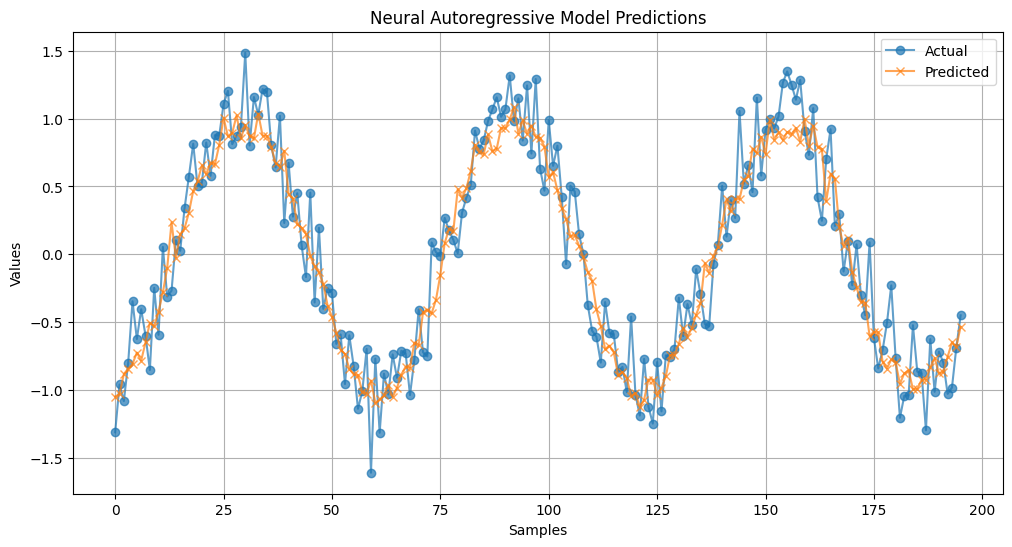

In [44]:
def plot_predictions(model, data_loader, title="Model Predictions"):
    """
    Generates predictions using the model and plots them against actual values.

    Args:
        model (nn.Module): The trained neural network model.
        data_loader (DataLoader): DataLoader containing the test dataset.
        title (str): Title for the plot (default: "Model Predictions").
    """
    model.eval()  # Set the model to evaluation mode
    predictions, actuals = [], []

    with torch.no_grad():  # Disable gradient calculation for inference
        for X_batch, y_batch in data_loader:
            outputs = model(X_batch)  # Forward pass
            predictions.extend(outputs.squeeze().tolist())  # Append predictions
            actuals.extend(y_batch.tolist())  # Append actual values

    # Plot the actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(actuals, label="Actual", linestyle='-', marker='o', alpha=0.7)
    plt.plot(predictions, label="Predicted", linestyle='-', marker='x', alpha=0.7)
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Values")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot 1-step-ahead predictions
plot_predictions(model, test_loader, title="Neural Autoregressive Model Predictions")

## Forecasting the Time Series with a Horizon h

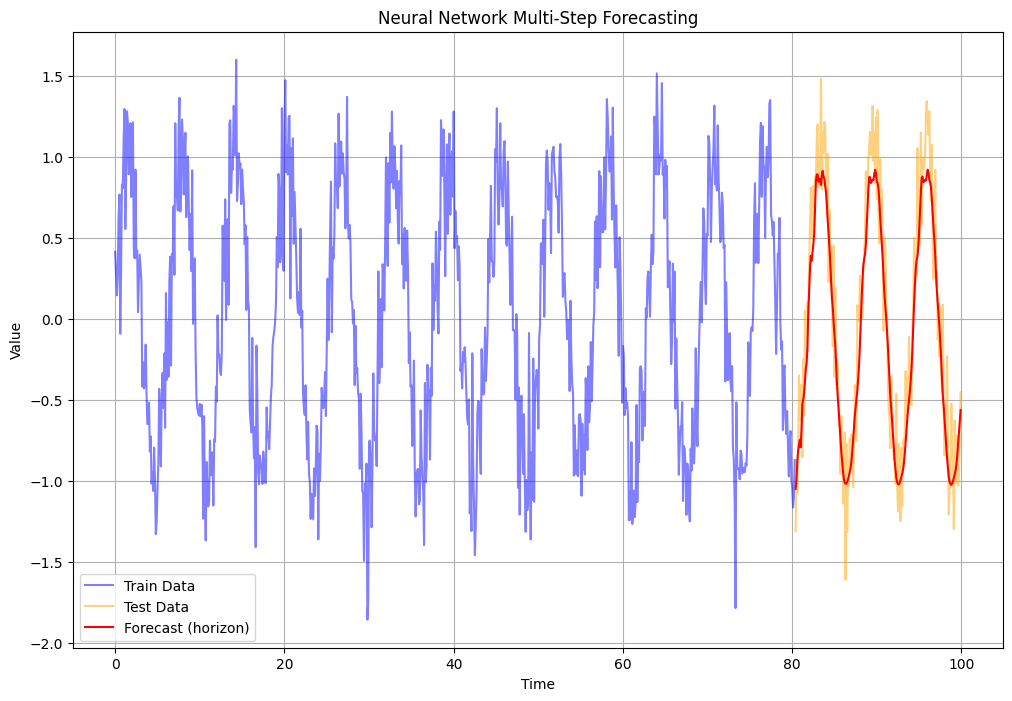

In [45]:
def multi_step_forecast(model, initial_sequence, horizon):
    """
    Perform h-step-ahead forecasting using a trained model.

    Args:
        model (nn.Module): The trained neural network model.
        initial_sequence (torch.Tensor): The initial sequence (lagged predictors) for the forecast.
        horizon (int): The number of steps to forecast.

    Returns:
        list: Forecasted values for the horizon.
    """
    model.eval()  # Set model to evaluation mode
    forecasted = []  # Store forecasted values
    current_sequence = initial_sequence.clone().detach()  # Start with the initial sequence

    with torch.no_grad():  # Disable gradient calculations
        for _ in range(horizon):
            # Predict the next value
            next_value = model(current_sequence.unsqueeze(0)).squeeze().item()
            forecasted.append(next_value)

            # Update the sequence by appending the new prediction and dropping the oldest value
            current_sequence = torch.cat([current_sequence[1:], torch.tensor([next_value])])

    return forecasted

def plot_forecasts(time, data, train_end_idx, test_start_idx, test_end_idx, forecasted_values, title="Time Series Forecasting"):
    """
    Plot the original time series data along with the forecasted values.

    Args:
        time (np.ndarray): Array of time indices.
        data (np.ndarray): Original time series data.
        train_end_idx (int): Index marking the end of the training data.
        test_start_idx (int): Index marking the start of the test data.
        test_end_idx (int): Index marking the end of the test data.
        forecasted_values (list): Forecasted values for the horizon.
        title (str): Title for the plot.
    """
    plt.figure(figsize=(12, 8))

    # Plot training data
    plt.plot(time[:train_end_idx], data[:train_end_idx], label="Train Data", color="blue", alpha=0.5)

    # Plot test data
    plt.plot(time[test_start_idx:test_end_idx], data[test_start_idx:test_end_idx], label="Test Data", color="orange", alpha=0.5)

    # Plot forecasted values
    forecast_start_idx = test_start_idx
    forecast_end_idx = test_start_idx + len(forecasted_values)
    plt.plot(time[forecast_start_idx:forecast_end_idx], forecasted_values, label="Forecast (horizon)", linestyle="-", color="red")

    # Customize the plot
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
horizon = len(y_test)  # Number of steps to forecast
test_sequence = torch.tensor(X_test[0], dtype=torch.float32)  # Use the first test sequence as input
forecasted_values = multi_step_forecast(model, test_sequence, horizon)

# Plot the results
train_end_idx = len(X_train) + SEQ_LENGTH
test_start_idx = len(X_train) + SEQ_LENGTH
test_end_idx = len(data)
plot_forecasts(time, data, train_end_idx, test_start_idx, test_end_idx, forecasted_values, title="Neural Network Multi-Step Forecasting")

# Open Question

- Experiment with adding a trend to the time series data
- Why are the forecasts not looking very good when using a long forecast horizon ($h$)?
- What could you do to improve the accuracy of long-$h$ forecasts?